In [2]:
from rsplib import RSPEngine, RSPPublisher, Stream, rdf_table,load_graph, accessURL

In [3]:
jasper = RSPEngine("http://jasper:8181/jasper")

In [4]:
jasper.streams()

[http://redstream:1255/red, http://jasper:8181/jasper/streams/redcount]

In [5]:
jasper.tasks()

[http://jasper:8181/jasper/queries/redcount]

In [6]:
qid = 'redgreen'
tbox = 'https://raw.githubusercontent.com/riccardotommasini/colorwave/master/colors.owl'
frmt = 'JSON'
body = '''
    
SELECT (COUNT(?r) AS ?cntr) (count(?g) AS ?cntg) ((?cntr>?cntg) as ?moreRedsThanGreens)
FROM NAMED WINDOW <rw> ON <http://redstream:1255/red> [RANGE PT15S STEP PT5S]
FROM NAMED WINDOW <gw> ON <http://greenstream:2255/green> [RANGE PT15S STEP PT5S]
WHERE {
    { WINDOW <rw> { ?r a <http://www.streamreasoning.org/ontologies/2018/9/colors#Red> .} }
    UNION 
    { WINDOW <gw> { ?g a <http://www.streamreasoning.org/ontologies/2018/9/colors#Green> .} }
}

    '''

In [7]:
jasper.create(qid, body, tbox, frmt)

In [8]:
jasper.streams()

[http://redstream:1255/red,
 http://greenstream:2255/green,
 http://jasper:8181/jasper/streams/redgreen,
 http://jasper:8181/jasper/streams/redcount]

In [9]:
redgreen = jasper.streams()[3]

In [10]:
r = jasper.expose(qid, 'HTTP', retention=5)

In [11]:
r

In [12]:
redgreen

In [13]:
redgreen.endpoints()


[GET http://jasper:8182/jasper/streams/redcount/observers/1978539811]

In [24]:
endpoint = jasper.getq(qid).stream().endpoints()[0]


In [25]:
resp = endpoint.call()

In [26]:
resp

In [27]:
df = resp.flatten()
df = df.dataframe(['results_bindings_0_cntg_value', 'results_bindings_0_cntr_value'])
df

,head_vars_0,head_vars_1,head_vars_2,results_bindings_0_cntg_datatype,results_bindings_0_cntg_type,results_bindings_0_cntg_value,results_bindings_0_cntr_datatype,results_bindings_0_cntr_type,results_bindings_0_cntr_value,results_bindings_0_moreRedsThanGreens_datatype,results_bindings_0_moreRedsThanGreens_type,results_bindings_0_moreRedsThanGreens_value
0,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,8,http://www.w3.org/2001/XMLSchema#integer,literal,7,http://www.w3.org/2001/XMLSchema#boolean,literal,false
1,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,3,http://www.w3.org/2001/XMLSchema#integer,literal,7,http://www.w3.org/2001/XMLSchema#boolean,literal,true
2,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,3,http://www.w3.org/2001/XMLSchema#integer,literal,6,http://www.w3.org/2001/XMLSchema#boolean,literal,true
3,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,3,http://www.w3.org/2001/XMLSchema#integer,literal,6,http://www.w3.org/2001/XMLSchema#boolean,literal,true
4,cntr,cntg,moreRedsThanGreens,http://www.w3.org/2001/XMLSchema#integer,literal,4,http://www.w3.org/2001/XMLSchema#integer,literal,6,http://www.w3.org/2001/XMLSchema#boolean,literal,true


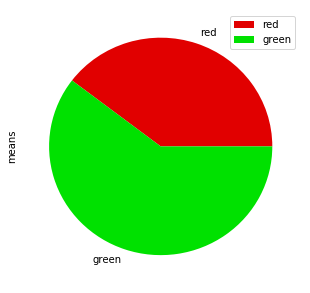

In [28]:
%matplotlib inline
import pandas as pd

df1 = df[['results_bindings_0_cntg_value','results_bindings_0_cntr_value']]
cntg_mean = df1['results_bindings_0_cntg_value'].mean()
cntr_mean = df1['results_bindings_0_cntr_value'].mean()

df = pd.DataFrame({'means': [cntg_mean, cntr_mean]}, index=['red', 'green'])
plot = df.plot.pie(y='means', colors=["#e10000", "#00e100"], figsize=(5, 5))

In [30]:
df.plot.line(y=['results_bindings_0_cntg_value', 'results_bindings_0_cntr_value'], figsize=(10,5), grid=True)

KeyError: "['results_bindings_0_cntg_value' 'results_bindings_0_cntr_value'] not in index"